<a href="https://colab.research.google.com/github/ClementGuerin-wagon/Olympic-Games/blob/main/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
df_results = pd.read_csv("/content/drive/MyDrive/olympic_results.csv")

In [ ]:
# know columns format - Transform columns to be in the right format

# Understand if there are Null values, if yes, it's important to understand their percentage (>60% : drop the entire column)

# For numerical data use the distributions to undertsand how to fill null values

# Understand different values of the column and what they represent

In [ ]:
df_results.dtypes

discipline_title         object
event_title              object
slug_game                object
participant_type         object
medal_type               object
athletes                 object
rank_equal               object
rank_position            object
country_name             object
country_code             object
country_3_letter_code    object
athlete_url              object
athlete_full_name        object
value_unit               object
value_type               object
dtype: object

In [ ]:
df_results["medal_type"].value_counts() / df_results.shape[0]

BRONZE    0.043175
GOLD      0.040595
SILVER    0.040343
Name: medal_type, dtype: float64

In [ ]:
df_results["athletes"].isnull().value_counts() / df_results.shape[0]

True     0.951009
False    0.048991
Name: athletes, dtype: float64

In [ ]:
df_results["rank_equal"].isnull().value_counts() / df_results.shape[0]

True     0.800214
False    0.199786
Name: rank_equal, dtype: float64

In [ ]:
df_results["rank_position"].isnull().value_counts() / df_results.shape[0]

False    0.97618
True     0.02382
Name: rank_position, dtype: float64

In [ ]:
df_results["athlete_url"].isnull().value_counts() / df_results.shape[0]

False    0.798451
True     0.201549
Name: athlete_url, dtype: float64

In [ ]:
df_results["athlete_full_name"].isnull().value_counts() / df_results.shape[0]

False    0.87004
True     0.12996
Name: athlete_full_name, dtype: float64

In [ ]:
df_results["value_unit"].isnull().value_counts() / df_results.shape[0]

True     0.516928
False    0.483072
Name: value_unit, dtype: float64

In [ ]:
df_results["value_type"].isnull().value_counts() / df_results.shape[0]

False    0.553113
True     0.446887
Name: value_type, dtype: float64

In [ ]:
df_results.columns

Index(['discipline_title', 'event_title', 'slug_game', 'participant_type',
       'medal_type', 'athletes', 'rank_equal', 'rank_position', 'country_name',
       'country_code', 'country_3_letter_code', 'athlete_url',
       'athlete_full_name', 'value_unit', 'value_type'],
      dtype='object')

In [ ]:
df_results.drop(columns = ["athletes", "rank_equal", "country_code", "athlete_url", "athlete_full_name"], inplace=True)

In [ ]:
df_results

,discipline_title,event_title,slug_game,participant_type,medal_type,rank_position,country_name,country_3_letter_code,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,1,Italy,ITA,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,2,Norway,NOR,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,3,Sweden,SWE,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,4,Great Britain,GBR,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,5,Canada,CAN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
162799,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,DNS,Poland,POL,NaN,IRM
162800,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,DNS,Poland,POL,NaN,IRM
162801,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,DNS,Czechoslovakia,TCH,NaN,IRM
162802,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,DNS,United States of America,USA,NaN,IRM


In [ ]:
# si valeur nulle, données catégoriques, alors prendre la valeur la + fréquente
# si valeur nulle, données numériques, prendre la moyenne (d'ou la distribution des valeurs) ou la médiane si données plus éparpillées
# si plus de 60% de valeurs nulles dans une colonne, supprimer la colonne

In [ ]:
df_rank_position = df_results[~ df_results["rank_position"].isnull()]

In [ ]:
df_results["rank_position"].isnull().sum()

3878

In [ ]:
df_rank_position[~ df_rank_position["rank_position"].str.isnumeric()]["rank_position"].value_counts()

DNF    7185
DNS    5390
DSQ    1562
LAP      15
PEN      13
WDR       6
YCD       2
DQB       2
Name: rank_position, dtype: int64

In [ ]:
# dnf : does not manage to finish the race
# dns : did not start their race
# dsq : disqualified
# lap : runner who is one or more laps behind.
# pen :
# wdr :
# ycd :
# dqb :

In [ ]:
df_results['rank_position']

0           1
1           2
2           3
3           4
4           5
         ... 
162799    DNS
162800    DNS
162801    DNS
162802    DNS
162803      1
Name: rank_position, Length: 162804, dtype: object

In [ ]:
df_results["rank_position"] = df_results["rank_position"].replace({"DNF" : 0, "DNS" : 0, "DSQ": 0, "LAP" : 0, "PEN" : 0, "WDR" : 0, "YCD" : 0, "DQB" : 0})

In [ ]:
df_results["rank_position"].isnull().value_counts()

False    158926
True       3878
Name: rank_position, dtype: int64

In [ ]:
df_results.fillna({'rank_position':0}, inplace=True)

In [ ]:
df_results["rank_position"].isnull().value_counts()

False    162804
Name: rank_position, dtype: int64

In [ ]:
#df_results["rank_position"] = int()

In [ ]:
df_results["rank_position"].value_counts()

0      18053
9       8279
5       8040
3       7115
1       6754
       ...  
143        5
139        5
138        5
163        5
149        5
Name: rank_position, Length: 186, dtype: int64

In [ ]:
df_results["value_unit"].isnull().sum()

84158

In [ ]:
df_results["value_unit"] = df_results["value_unit"].replace({"LAP" : 0})

In [ ]:
df_results.isnull().sum()

discipline_title              0
event_title                   0
slug_game                     0
participant_type              0
medal_type               142598
rank_position                 0
country_name                  0
country_3_letter_code         0
value_unit                84158
value_type                72755
dtype: int64

In [ ]:
df_results["value_type"].isnull().sum()/ df_results.shape[0]

0.44688705437212844

In [ ]:
df_results.drop(columns = ["value_unit", "value_type"], inplace=True)

In [ ]:
df_results

,discipline_title,event_title,slug_game,participant_type,medal_type,rank_position,country_name,country_3_letter_code
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,1,Italy,ITA
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,2,Norway,NOR
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,3,Sweden,SWE
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,4,Great Britain,GBR
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,5,Canada,CAN
...,...,...,...,...,...,...,...,...
162799,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,0,Poland,POL
162800,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,0,Poland,POL
162801,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,0,Czechoslovakia,TCH
162802,Ski Jumping,Normal Hill Individual men,chamonix-1924,Athlete,NaN,0,United States of America,USA


<Axes: >

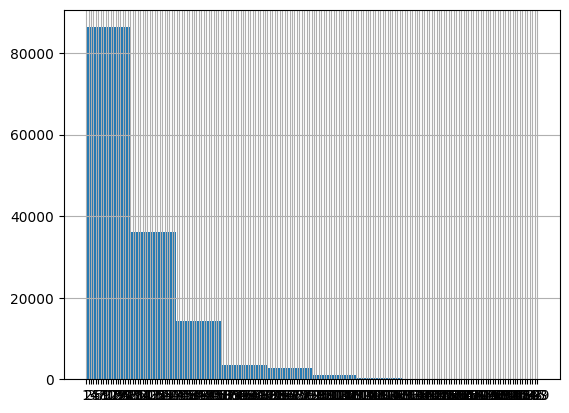

In [ ]:
df_rank_position[df_rank_position["rank_position"].str.isnumeric()]["rank_position"].hist(bins = 10)

In [ ]:
# df_num = df_1[df_1["rank_position"].str.isnumeric()]

In [ ]:
df_results["medal_type"].value_counts().sum()

20206

In [ ]:
df_results["rank_position"]

0         1
1         2
2         3
3         4
4         5
         ..
162799    0
162800    0
162801    0
162802    0
162803    1
Name: rank_position, Length: 162804, dtype: object

In [ ]:
df_results['rank_position'] = df_results['rank_position'].astype(int)

In [ ]:
df_results.dtypes

discipline_title         object
event_title              object
slug_game                object
participant_type         object
medal_type               object
rank_position             int64
country_name             object
country_3_letter_code    object
dtype: object

In [ ]:
df_results.to_csv("Results_cleaned.csv", index=False)

<Axes: >

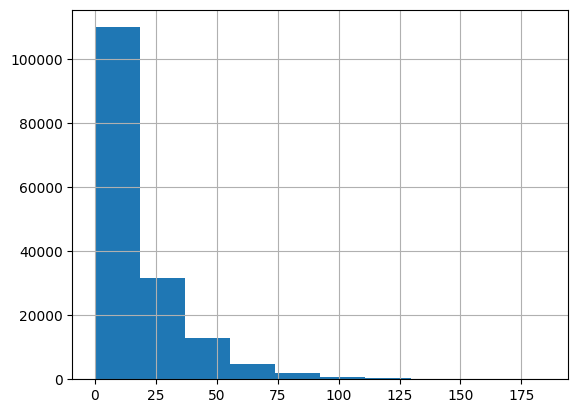

In [ ]:
df_results["rank_position"].hist()

In [ ]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162804 entries, 0 to 162803
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   discipline_title       162804 non-null  object
 1   event_title            162804 non-null  object
 2   slug_game              162804 non-null  object
 3   participant_type       162804 non-null  object
 4   medal_type             20206 non-null   object
 5   rank_position          162804 non-null  int64 
 6   country_name           162804 non-null  object
 7   country_3_letter_code  162804 non-null  object
dtypes: int64(1), object(7)
memory usage: 9.9+ MB
